In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = pd.read_csv('german_credit_data.csv')


In [ ]:
# Convert categorical variables to numerical
label_encoder = LabelEncoder()

df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Housing'] = label_encoder.fit_transform(df['Housing'])
df['Saving accounts'] = label_encoder.fit_transform(df['Saving accounts'])
df['Checking account'] = label_encoder.fit_transform(df['Checking account'])
df['Purpose'] = label_encoder.fit_transform(df['Purpose'])
df["Risk"] = df["Risk"].map({'good': 1, 'bad': 0}) 

# Split data into independent and dependent variables
X = df.drop('Risk', axis=1)
y = df['Risk']
y.fillna(0 , inplace=True)
y = np.array(y)

# Scale the features to a similar range
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create SVM model with a linear kernel
clf = SVC(kernel='linear', C=1.0)

# Train the SVM model on the training data
clf.fit(X_train, y_train)


In [ ]:
# Use the trained SVM model to predict the labels of the test data
y_pred = clf.predict(X_test)

# Compute the accuracy score of the SVM model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


In [ ]:
y = np.array(df["Risk"])
y

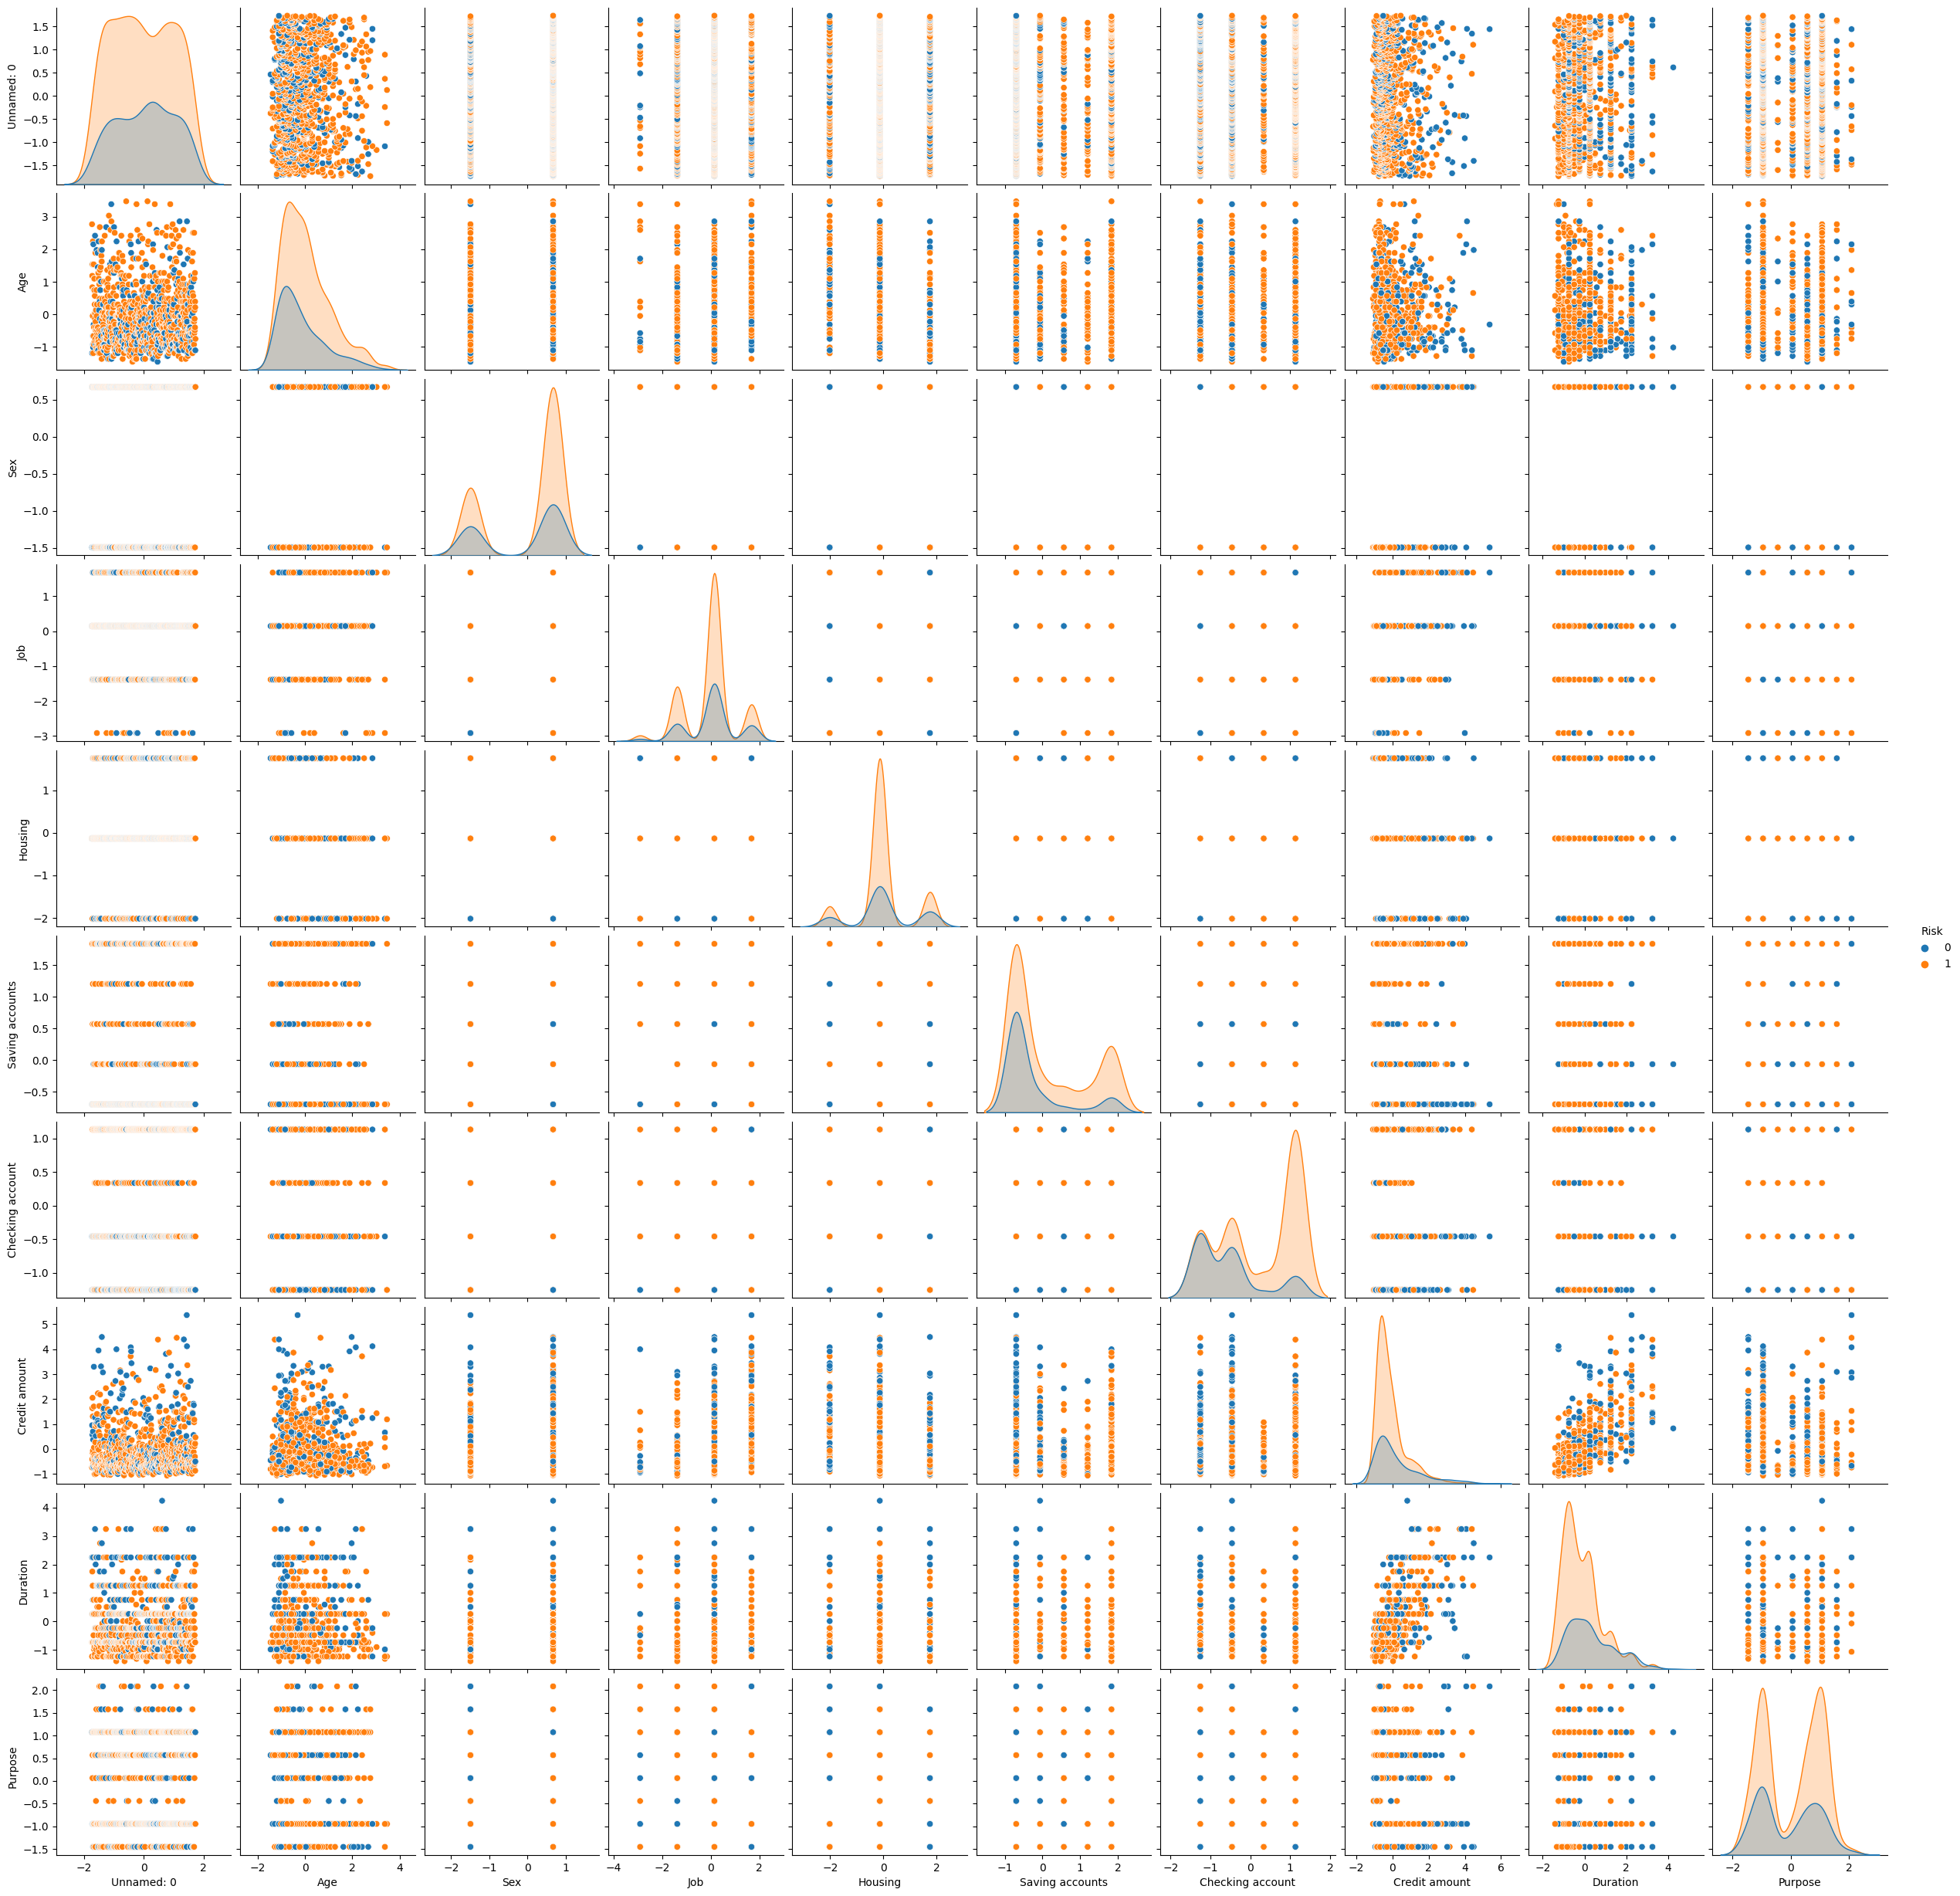

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new DataFrame with scaled features
df_scaled = pd.DataFrame(X, columns=df.columns[:-1])

# Add the 'Risk' column back to the scaled DataFrame
df_scaled['Risk'] = df['Risk']

# Visualize the SVM model using pair plot
sns.pairplot(df_scaled, hue='Risk')
plt.show()
